# Аппроксимация функции

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns

from tqdm import tqdm

sns.set_theme()

ModuleNotFoundError: No module named 'torch'

In [ ]:
c:/Users/Alex/Desktop/aya-ml/.venv/Scripts/python.exe -m pip install ipykernel -U --force-reinstall

: 

In [2]:
X_train = torch.tensor(np.random.uniform(-20, 20, (1000, 1))).type(torch.float32)
y_train = np.cos(X_train + np.pi / 2) + np.arctan(X_train)
X_test  = torch.tensor(np.random.uniform(-20, 20, (1000, 1))).type(torch.float32)
y_test  = np.cos(X_test + np.pi / 2) + np.arctan(X_test)

## Модель 1
Модель нейронной сети с ```2``` скрытыми слоями, по ```hidden_neurons``` нейронов в каждом.

In [7]:
class NeuralNetwork1(nn.Module):
    def __init__(self, hidden_neurons):
        super(NeuralNetwork1, self).__init__()
        
        self.fc1  = torch.nn.Linear(1, hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2  = torch.nn.Linear(hidden_neurons, hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3  = torch.nn.Linear(hidden_neurons, 1)
        
        self.fig, self.ax = plt.subplots(3, 1, figsize=(7, 5))
        self.fig.subplots_adjust(top=1,
                                 bottom= 0.1,
                                 wspace=0.5,
                                 hspace=0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        
        return x
    
    def make_plot(self, pred, pos, ep_loss, ep):
        self.ax[pos].cla()
        self.ax[pos].set_title(f"Epoch: {ep}, MSE: {ep_loss}", fontsize=12)
        self.ax[pos].scatter(X_train, y_train, color='g', marker='o')
        self.ax[pos].scatter(X_test, pred.detach().numpy(), color='r', marker='.')
    
    def show(self):
        plt.show()
    
    def fit(self, x, y, epoch=50_000, learning_rate=0.01):
        loss      = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        
        pos       = 0
        
        for ep_ in tqdm(range(epoch)):
            optimizer.zero_grad()
            y_pred   = self.forward(x)
            loss_val = loss(y_pred, y)
            loss_val.backward()
            optimizer.step()
            
            if not (ep_ + 1) % (epoch // 3):
                y_pred = self.forward(X_test)
                self.make_plot(y_pred, pos, loss_val, ep_ + 1)
                pos += 1
        
    def predict(self, x):
        return self.forward(x)

### Результаты первой модели

In [ ]:
%%time
MyNN_1 = NeuralNetwork1(10)
MyNN_1.fit(X_train, y_train)
MyNN_1.show()

 19%|██████████████▏                                                             | 9346/50000 [00:14<01:32, 438.92it/s]

## Модель 2
Модель нейронной сети с ```1``` скрытым слоем, по ```hidden_neurons``` нейронов в каждом.

In [95]:
class NeuralNetwork2(nn.Module):
    def __init__(self, hidden_neurons):
        super(NeuralNetwork2, self).__init__()
        
        self.fc1  = torch.nn.Linear(1, hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2  = torch.nn.Linear(hidden_neurons, hidden_neurons * 3)
        self.act2 = torch.nn.ReLU()
        self.fc3  = torch.nn.Linear(hidden_neurons * 3, 1)
        
        self.fig, self.ax = plt.subplots(3, 1, figsize=(7, 5))
        self.fig.subplots_adjust(top=1,
                                 bottom= 0.1,
                                 wspace=0.5,
                                 hspace=0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        
        return x
    
    def make_plot(self, pred, pos, ep_loss, ep):
        self.ax[pos].cla()
        self.ax[pos].set_title(f"Epoch: {ep}, MSE: {ep_loss}", fontsize=12)
        self.ax[pos].scatter(X_train, y_train, color='g', marker='o')
        self.ax[pos].scatter(X_test, pred.detach().numpy(), color='r', marker='.')
    
    def show(self):
        plt.show()
    
    def fit(self, x, y, epoch=10_000, learning_rate=0.01):
        loss      = nn.SmoothL1Loss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        
        pos       = 0
        
        for ep_ in tqdm(range(epoch)):
            optimizer.zero_grad()
            y_pred   = self.forward(x)
            loss_val = loss(y_pred, y)
            loss_val.backward()
            optimizer.step()
            
            if not (ep_ + 1) % (epoch // 3):
                y_pred = self.forward(X_test)
                self.make_plot(y_pred, pos, loss_val, ep_ + 1)
                pos += 1
    
    def predict(self, x):
        return self.forward(x)

### Результаты второй модели

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:32<00:00, 308.57it/s]


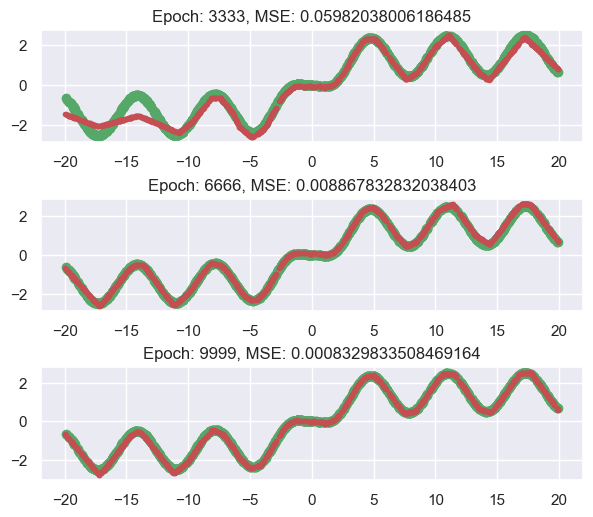

Wall time: 32.8 s


In [96]:
%%time
MyNN_2 = NeuralNetwork2(50)
MyNN_2.fit(X_train, y_train)
MyNN_2.show()